<a href="https://colab.research.google.com/github/mokuda2/hacklytics/blob/main/FinCast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to FinCast! 

In this notebook we create a model to forcast stock prices in order to gain profits.

In [3]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 13.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
# import the necessary libraries
import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
#  import tensorflow libraries
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import os 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [4]:
#mount drive 
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
# getting latest data
def get_data(stocks, start, end):
    df = pdr.get_data_yahoo(stocks, start, end)
    return df

endDate = datetime.datetime.now()
startDate = endDate - datetime.timedelta(days=30)

In [6]:
def lstm_split(data, n_steps): 
  X,y =[], []
  for i in range(len(data)-n_steps+1):
    X.append(data[i:i+n_steps, :-1])
    y.append(data[i+n_steps-1,-1])
  return np.array(X), np.array(y)

In [7]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.figure(figsize=(15,10))
    plt.plot(range(len(y_test)), y_test, color='blue')
    plt.plot(range(len(y_pred)), y_pred, color='red')
    plt.legend()
    plt.title(regressorName)
    plt.show()
    return

In [8]:
!pwd

/content


In [16]:
#!rm -r ./saved_model

In [10]:
tickers = ['TSLA', 'AAPL', 'AMZN', 'GOOG', 'MSFT']

In [11]:
def LSTM_model(X_train):
    
    model = Sequential()
    
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    
    model.add(Dense(units=1))
    
    return model

[*********************100%***********************]  1 of 1 completed
Data Preprocessing for TSLA Stocks
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                  

54/54 [==============================] - 26s 203ms/step - loss: 0.0105
Epoch 2/25
54/54 [==============================] - ETA: 0s - loss: 0.0019

54/54 [==============================] - 5s 98ms/step - loss: 0.0019
Epoch 3/25
54/54 [==============================] - ETA: 0s - loss: 0.0019

54/54 [==============================] - 7s 136ms/step - loss: 0.0019
Epoch 4/25
54/54 [==============================] - ETA: 0s - loss: 0.0018

54/54 [==============================] - 5s 101ms/step - loss: 0.0018
Epoch 5/25
54/54 [==============================] - ETA: 0s - loss: 0.0015

54/54 [==============================] - 8s 142ms/step - loss: 0.0015
Epoch 6/25
54/54 [==============================] - ETA: 0s - loss: 0.0013

54/54 [==============================] - 6s 103ms/step - loss: 0.0013
Epoch 7/25
54/54 [==============================] - ETA: 0s - loss: 0.0015

54/54 [==============================] - 6s 119ms/step - loss: 0.0015
Epoch 8/25
54/54 [==============================] - ETA: 0s - loss: 0.0015

54/54 [==============================] - 6s 118ms/step - loss: 0.0015
Epoch 9/25
54/54 [==============================] - ETA: 0s - loss: 0.0014

54/54 [==============================] - 8s 149ms/step - loss: 0.0014
Epoch 10/25
54/54 [==============================] - ETA: 0s - loss: 0.0011

54/54 [==============================] - 7s 120ms/step - loss: 0.0011
Epoch 11/25
54/54 [==============================] - ETA: 0s - loss: 0.0015

54/54 [==============================] - 5s 100ms/step - loss: 0.0015
Epoch 12/25
54/54 [==============================] - ETA: 0s - loss: 0.0012

54/54 [==============================] - 7s 138ms/step - loss: 0.0012
Epoch 13/25
54/54 [==============================] - ETA: 0s - loss: 0.0012

54/54 [==============================] - 5s 100ms/step - loss: 0.0012
Epoch 14/25
54/54 [==============================] - ETA: 0s - loss: 0.0010

54/54 [==============================] - 7s 137ms/step - loss: 0.0010
Epoch 15/25
54/54 [==============================] - ETA: 0s - loss: 0.0014

54/54 [==============================] - 6s 105ms/step - loss: 0.0014
Epoch 16/25
54/54 [==============================] - ETA: 0s - loss: 9.8669e-04

54/54 [==============================] - 7s 127ms/step - loss: 9.8669e-04
Epoch 17/25
54/54 [==============================] - ETA: 0s - loss: 0.0012

54/54 [==============================] - 6s 111ms/step - loss: 0.0012
Epoch 18/25
54/54 [==============================] - ETA: 0s - loss: 0.0012

54/54 [==============================] - 6s 105ms/step - loss: 0.0012
Epoch 19/25
54/54 [==============================] - ETA: 0s - loss: 9.4892e-04

54/54 [==============================] - 7s 135ms/step - loss: 9.4892e-04
Epoch 20/25
54/54 [==============================] - ETA: 0s - loss: 0.0011

54/54 [==============================] - 6s 104ms/step - loss: 0.0011
Epoch 21/25
54/54 [==============================] - ETA: 0s - loss: 9.4915e-04

54/54 [==============================] - 8s 143ms/step - loss: 9.4915e-04
Epoch 22/25
54/54 [==============================] - ETA: 0s - loss: 0.0013

54/54 [==============================] - 6s 107ms/step - loss: 0.0013
Epoch 23/25
54/54 [==============================] - ETA: 0s - loss: 0.0010

54/54 [==============================] - 8s 144ms/step - loss: 0.0010
Epoch 24/25
54/54 [==============================] - ETA: 0s - loss: 9.2963e-04

54/54 [==============================] - 6s 109ms/step - loss: 9.2963e-04
Epoch 25/25
54/54 [==============================] - ETA: 0s - loss: 9.4004e-04

54/54 [==============================] - 8s 146ms/step - loss: 9.4004e-04
[*********************100%***********************]  1 of 1 completed
9/9 [==============================] - 2s 48ms/step
Directory 'lstm_saved_model' created


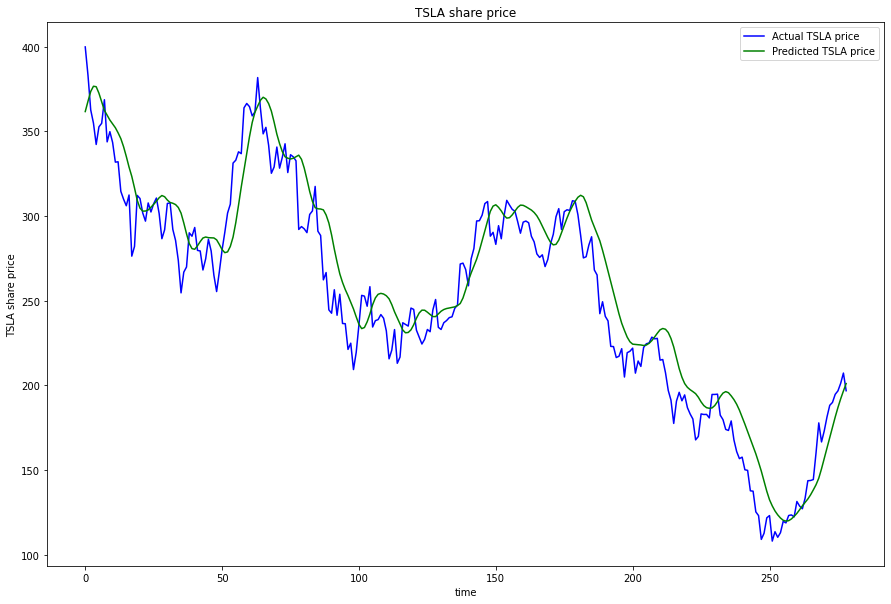

1/1 [==============================] - 1s 1s/step
prediction: [[204.42845]]
[*********************100%***********************]  1 of 1 completed
Data Preprocessing for AAPL Stocks
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_3 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dropo

54/54 [==============================] - 14s 141ms/step - loss: 0.0140
Epoch 2/25
54/54 [==============================] - ETA: 0s - loss: 0.0020

54/54 [==============================] - 6s 104ms/step - loss: 0.0020
Epoch 3/25
54/54 [==============================] - ETA: 0s - loss: 0.0022

54/54 [==============================] - 8s 145ms/step - loss: 0.0022
Epoch 4/25
54/54 [==============================] - ETA: 0s - loss: 0.0019

54/54 [==============================] - 6s 107ms/step - loss: 0.0019
Epoch 5/25
54/54 [==============================] - ETA: 0s - loss: 0.0018

54/54 [==============================] - 8s 143ms/step - loss: 0.0018
Epoch 6/25
54/54 [==============================] - ETA: 0s - loss: 0.0018

54/54 [==============================] - 6s 108ms/step - loss: 0.0018
Epoch 7/25
54/54 [==============================] - ETA: 0s - loss: 0.0017

54/54 [==============================] - 7s 129ms/step - loss: 0.0017
Epoch 8/25
54/54 [==============================] - ETA: 0s - loss: 0.0018

54/54 [==============================] - 6s 117ms/step - loss: 0.0018
Epoch 9/25
54/54 [==============================] - ETA: 0s - loss: 0.0018

54/54 [==============================] - 6s 113ms/step - loss: 0.0018
Epoch 10/25
54/54 [==============================] - ETA: 0s - loss: 0.0016

54/54 [==============================] - 7s 136ms/step - loss: 0.0016
Epoch 11/25
54/54 [==============================] - ETA: 0s - loss: 0.0014

54/54 [==============================] - 6s 104ms/step - loss: 0.0014
Epoch 12/25
54/54 [==============================] - ETA: 0s - loss: 0.0013

54/54 [==============================] - 8s 146ms/step - loss: 0.0013
Epoch 13/25
54/54 [==============================] - ETA: 0s - loss: 0.0015

54/54 [==============================] - 6s 105ms/step - loss: 0.0015
Epoch 14/25
54/54 [==============================] - ETA: 0s - loss: 0.0014

54/54 [==============================] - 8s 143ms/step - loss: 0.0014
Epoch 15/25
54/54 [==============================] - ETA: 0s - loss: 0.0014

54/54 [==============================] - 6s 106ms/step - loss: 0.0014
Epoch 16/25
54/54 [==============================] - ETA: 0s - loss: 0.0012

54/54 [==============================] - 8s 140ms/step - loss: 0.0012
Epoch 17/25
54/54 [==============================] - ETA: 0s - loss: 0.0011

54/54 [==============================] - 6s 110ms/step - loss: 0.0011
Epoch 18/25
54/54 [==============================] - ETA: 0s - loss: 0.0012

54/54 [==============================] - 6s 115ms/step - loss: 0.0012
Epoch 19/25
54/54 [==============================] - ETA: 0s - loss: 0.0014

54/54 [==============================] - 7s 127ms/step - loss: 0.0014
Epoch 20/25
54/54 [==============================] - ETA: 0s - loss: 0.0015

54/54 [==============================] - 6s 109ms/step - loss: 0.0015
Epoch 21/25
54/54 [==============================] - ETA: 0s - loss: 0.0013

54/54 [==============================] - 8s 144ms/step - loss: 0.0013
Epoch 22/25
54/54 [==============================] - ETA: 0s - loss: 0.0012

54/54 [==============================] - 6s 105ms/step - loss: 0.0012
Epoch 23/25
54/54 [==============================] - ETA: 0s - loss: 0.0010

54/54 [==============================] - 8s 142ms/step - loss: 0.0010
Epoch 24/25
54/54 [==============================] - ETA: 0s - loss: 0.0011

54/54 [==============================] - 6s 108ms/step - loss: 0.0011
Epoch 25/25
54/54 [==============================] - ETA: 0s - loss: 0.0010

54/54 [==============================] - 8s 142ms/step - loss: 0.0010
[*********************100%***********************]  1 of 1 completed
9/9 [==============================] - 2s 31ms/step
Directory 'lstm_saved_model' created


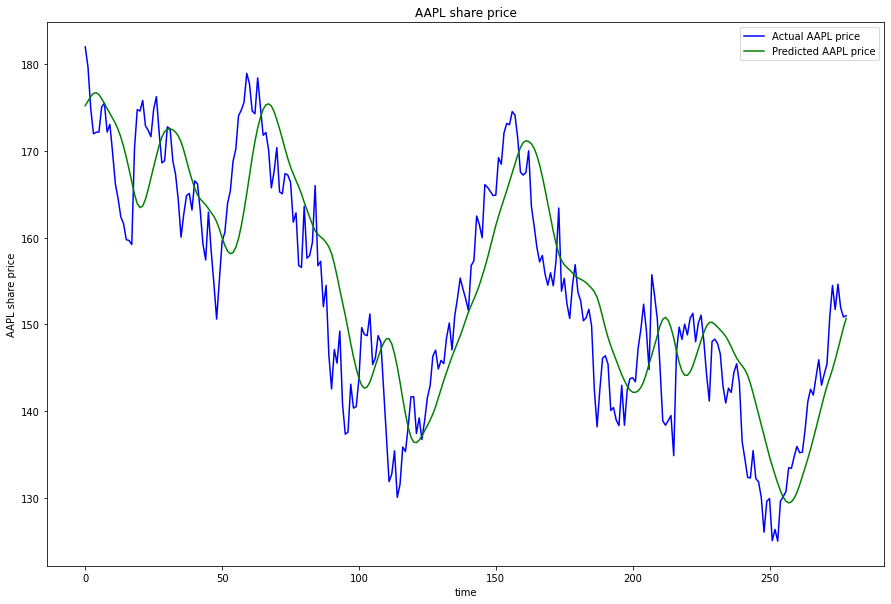

1/1 [==============================] - 1s 1s/step
prediction: [[151.56429]]
[*********************100%***********************]  1 of 1 completed
Data Preprocessing for AMZN Stocks
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_7 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dropo

54/54 [==============================] - 14s 109ms/step - loss: 0.0152
Epoch 2/25
54/54 [==============================] - ETA: 0s - loss: 0.0039

54/54 [==============================] - 8s 140ms/step - loss: 0.0039
Epoch 3/25
54/54 [==============================] - ETA: 0s - loss: 0.0033

54/54 [==============================] - 6s 111ms/step - loss: 0.0033
Epoch 4/25
54/54 [==============================] - ETA: 0s - loss: 0.0033

54/54 [==============================] - 10s 181ms/step - loss: 0.0033
Epoch 5/25
54/54 [==============================] - ETA: 0s - loss: 0.0034

54/54 [==============================] - 9s 159ms/step - loss: 0.0034
Epoch 6/25
54/54 [==============================] - ETA: 0s - loss: 0.0035

54/54 [==============================] - 9s 161ms/step - loss: 0.0035
Epoch 7/25
54/54 [==============================] - ETA: 0s - loss: 0.0029

54/54 [==============================] - 7s 123ms/step - loss: 0.0029
Epoch 8/25
54/54 [==============================] - ETA: 0s - loss: 0.0028

54/54 [==============================] - 8s 156ms/step - loss: 0.0028
Epoch 9/25
54/54 [==============================] - ETA: 0s - loss: 0.0023

54/54 [==============================] - 6s 120ms/step - loss: 0.0023
Epoch 10/25
54/54 [==============================] - ETA: 0s - loss: 0.0026

54/54 [==============================] - 8s 156ms/step - loss: 0.0026
Epoch 11/25
54/54 [==============================] - ETA: 0s - loss: 0.0024

54/54 [==============================] - 7s 122ms/step - loss: 0.0024
Epoch 12/25
54/54 [==============================] - ETA: 0s - loss: 0.0022

54/54 [==============================] - 8s 157ms/step - loss: 0.0022
Epoch 13/25
54/54 [==============================] - ETA: 0s - loss: 0.0025

54/54 [==============================] - 7s 125ms/step - loss: 0.0025
Epoch 14/25
54/54 [==============================] - ETA: 0s - loss: 0.0022

54/54 [==============================] - 9s 163ms/step - loss: 0.0022
Epoch 15/25
54/54 [==============================] - ETA: 0s - loss: 0.0024

54/54 [==============================] - 7s 132ms/step - loss: 0.0024
Epoch 16/25
54/54 [==============================] - ETA: 0s - loss: 0.0022

54/54 [==============================] - 9s 160ms/step - loss: 0.0022
Epoch 17/25
54/54 [==============================] - ETA: 0s - loss: 0.0021

54/54 [==============================] - 6s 117ms/step - loss: 0.0021
Epoch 18/25
54/54 [==============================] - ETA: 0s - loss: 0.0022

54/54 [==============================] - 8s 156ms/step - loss: 0.0022
Epoch 19/25
54/54 [==============================] - ETA: 0s - loss: 0.0020

54/54 [==============================] - 7s 124ms/step - loss: 0.0020
Epoch 20/25
54/54 [==============================] - ETA: 0s - loss: 0.0018

54/54 [==============================] - 9s 158ms/step - loss: 0.0018
Epoch 21/25
54/54 [==============================] - ETA: 0s - loss: 0.0018

54/54 [==============================] - 7s 121ms/step - loss: 0.0018
Epoch 22/25
54/54 [==============================] - ETA: 0s - loss: 0.0015

54/54 [==============================] - 8s 156ms/step - loss: 0.0015
Epoch 23/25
54/54 [==============================] - ETA: 0s - loss: 0.0018

54/54 [==============================] - 6s 119ms/step - loss: 0.0018
Epoch 24/25
54/54 [==============================] - ETA: 0s - loss: 0.0017

54/54 [==============================] - 8s 154ms/step - loss: 0.0017
Epoch 25/25
54/54 [==============================] - ETA: 0s - loss: 0.0017

54/54 [==============================] - 7s 128ms/step - loss: 0.0017
[*********************100%***********************]  1 of 1 completed
9/9 [==============================] - 3s 54ms/step
Directory 'lstm_saved_model' created


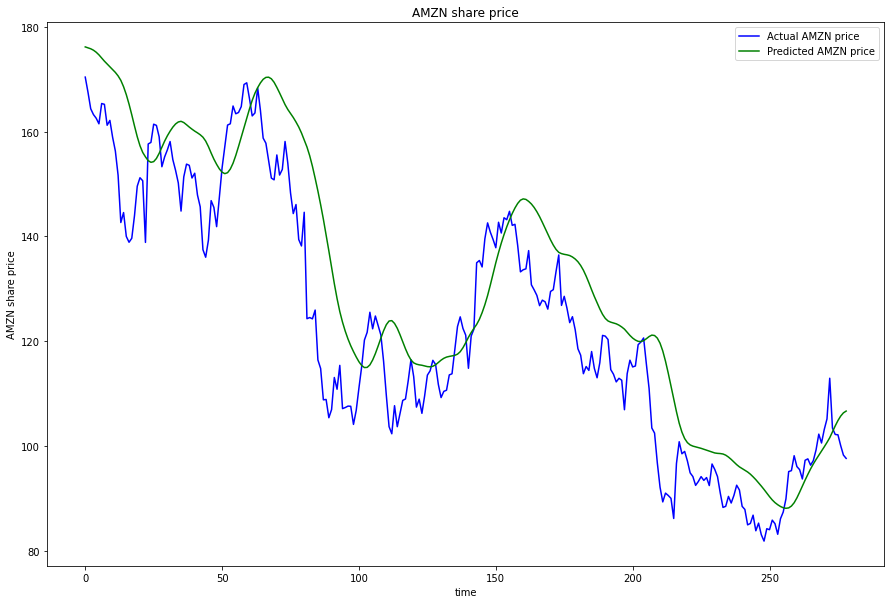

1/1 [==============================] - 3s 3s/step
prediction: [[106.71296]]
[*********************100%***********************]  1 of 1 completed
Data Preprocessing for GOOG Stocks
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_9 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_10 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_10 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dropo

54/54 [==============================] - 20s 160ms/step - loss: 0.0112
Epoch 2/25
54/54 [==============================] - ETA: 0s - loss: 0.0022

54/54 [==============================] - 9s 175ms/step - loss: 0.0022
Epoch 3/25
54/54 [==============================] - ETA: 0s - loss: 0.0020

54/54 [==============================] - 8s 139ms/step - loss: 0.0020
Epoch 4/25
54/54 [==============================] - ETA: 0s - loss: 0.0022

54/54 [==============================] - 9s 172ms/step - loss: 0.0022
Epoch 5/25
54/54 [==============================] - ETA: 0s - loss: 0.0019

54/54 [==============================] - 7s 137ms/step - loss: 0.0019
Epoch 6/25
54/54 [==============================] - ETA: 0s - loss: 0.0021

54/54 [==============================] - 10s 183ms/step - loss: 0.0021
Epoch 7/25
54/54 [==============================] - ETA: 0s - loss: 0.0021

54/54 [==============================] - 8s 152ms/step - loss: 0.0021
Epoch 8/25
54/54 [==============================] - ETA: 0s - loss: 0.0016

54/54 [==============================] - 9s 157ms/step - loss: 0.0016
Epoch 9/25
54/54 [==============================] - ETA: 0s - loss: 0.0015

54/54 [==============================] - 9s 163ms/step - loss: 0.0015
Epoch 10/25
54/54 [==============================] - ETA: 0s - loss: 0.0014

54/54 [==============================] - 8s 140ms/step - loss: 0.0014
Epoch 11/25
54/54 [==============================] - ETA: 0s - loss: 0.0013

54/54 [==============================] - 10s 177ms/step - loss: 0.0013
Epoch 12/25
54/54 [==============================] - ETA: 0s - loss: 0.0016

54/54 [==============================] - 8s 140ms/step - loss: 0.0016
Epoch 13/25
54/54 [==============================] - ETA: 0s - loss: 0.0014

54/54 [==============================] - 9s 176ms/step - loss: 0.0014
Epoch 14/25
54/54 [==============================] - ETA: 0s - loss: 0.0014

54/54 [==============================] - 8s 150ms/step - loss: 0.0014
Epoch 15/25
54/54 [==============================] - ETA: 0s - loss: 0.0015

54/54 [==============================] - 9s 168ms/step - loss: 0.0015
Epoch 16/25
54/54 [==============================] - ETA: 0s - loss: 0.0012

54/54 [==============================] - 9s 169ms/step - loss: 0.0012
Epoch 17/25
54/54 [==============================] - ETA: 0s - loss: 0.0012

54/54 [==============================] - 8s 142ms/step - loss: 0.0012
Epoch 18/25
54/54 [==============================] - ETA: 0s - loss: 0.0012

54/54 [==============================] - 9s 175ms/step - loss: 0.0012
Epoch 19/25
54/54 [==============================] - ETA: 0s - loss: 0.0013

54/54 [==============================] - 8s 144ms/step - loss: 0.0013
Epoch 20/25
54/54 [==============================] - ETA: 0s - loss: 0.0011

54/54 [==============================] - 9s 174ms/step - loss: 0.0011
Epoch 21/25
54/54 [==============================] - ETA: 0s - loss: 0.0011

54/54 [==============================] - 9s 159ms/step - loss: 0.0011
Epoch 22/25
54/54 [==============================] - ETA: 0s - loss: 0.0013

54/54 [==============================] - 8s 146ms/step - loss: 0.0013
Epoch 23/25
54/54 [==============================] - ETA: 0s - loss: 0.0010

54/54 [==============================] - 9s 176ms/step - loss: 0.0010
Epoch 24/25
54/54 [==============================] - ETA: 0s - loss: 0.0012

54/54 [==============================] - 7s 130ms/step - loss: 0.0012
Epoch 25/25
54/54 [==============================] - ETA: 0s - loss: 0.0011

54/54 [==============================] - 10s 180ms/step - loss: 0.0011
[*********************100%***********************]  1 of 1 completed
9/9 [==============================] - 2s 39ms/step
Directory 'lstm_saved_model' created


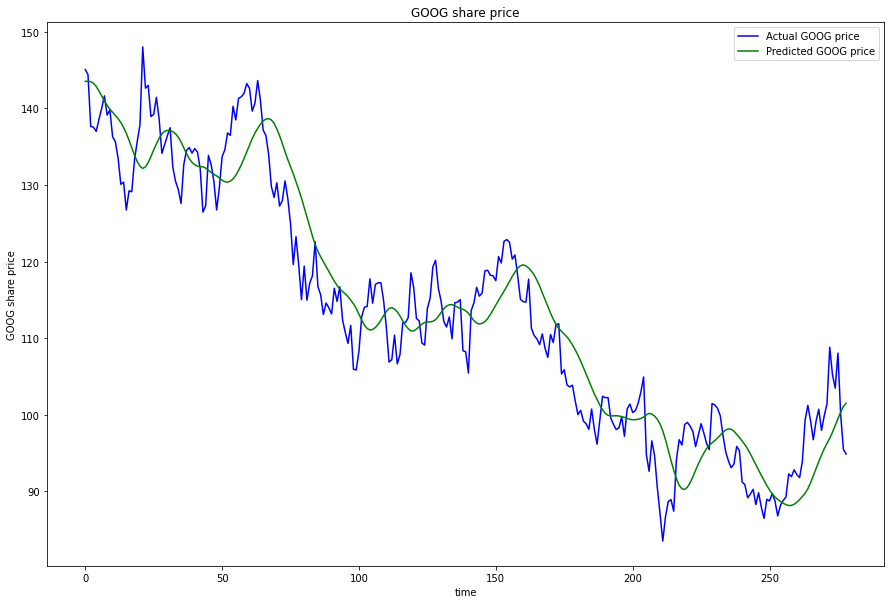

1/1 [==============================] - 2s 2s/step
prediction: [[101.55009]]
[*********************100%***********************]  1 of 1 completed
Data Preprocessing for MSFT Stocks
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_12 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_13 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_13 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dropo

54/54 [==============================] - 15s 156ms/step - loss: 0.0149
Epoch 2/25
54/54 [==============================] - ETA: 0s - loss: 0.0022

54/54 [==============================] - 6s 114ms/step - loss: 0.0022
Epoch 3/25
54/54 [==============================] - ETA: 0s - loss: 0.0020

54/54 [==============================] - 8s 155ms/step - loss: 0.0020
Epoch 4/25
54/54 [==============================] - ETA: 0s - loss: 0.0019

54/54 [==============================] - 6s 114ms/step - loss: 0.0019
Epoch 5/25
54/54 [==============================] - ETA: 0s - loss: 0.0023

54/54 [==============================] - 8s 151ms/step - loss: 0.0023
Epoch 6/25
54/54 [==============================] - ETA: 0s - loss: 0.0016

54/54 [==============================] - 6s 115ms/step - loss: 0.0016
Epoch 7/25
54/54 [==============================] - ETA: 0s - loss: 0.0017

54/54 [==============================] - 8s 150ms/step - loss: 0.0017
Epoch 8/25
54/54 [==============================] - ETA: 0s - loss: 0.0017

54/54 [==============================] - 6s 112ms/step - loss: 0.0017
Epoch 9/25
54/54 [==============================] - ETA: 0s - loss: 0.0013

54/54 [==============================] - 9s 158ms/step - loss: 0.0013
Epoch 10/25
54/54 [==============================] - ETA: 0s - loss: 0.0014

54/54 [==============================] - 6s 116ms/step - loss: 0.0014
Epoch 11/25
54/54 [==============================] - ETA: 0s - loss: 0.0017

54/54 [==============================] - 8s 153ms/step - loss: 0.0017
Epoch 12/25
54/54 [==============================] - ETA: 0s - loss: 0.0014

54/54 [==============================] - 6s 116ms/step - loss: 0.0014
Epoch 13/25
54/54 [==============================] - ETA: 0s - loss: 0.0012

54/54 [==============================] - 8s 149ms/step - loss: 0.0012
Epoch 14/25
54/54 [==============================] - ETA: 0s - loss: 0.0013

54/54 [==============================] - 6s 118ms/step - loss: 0.0013
Epoch 15/25
54/54 [==============================] - ETA: 0s - loss: 0.0013

54/54 [==============================] - 8s 150ms/step - loss: 0.0013
Epoch 16/25
54/54 [==============================] - ETA: 0s - loss: 0.0013

54/54 [==============================] - 7s 127ms/step - loss: 0.0013
Epoch 17/25
54/54 [==============================] - ETA: 0s - loss: 0.0014

54/54 [==============================] - 8s 142ms/step - loss: 0.0014
Epoch 18/25
54/54 [==============================] - ETA: 0s - loss: 0.0017

54/54 [==============================] - 7s 128ms/step - loss: 0.0017
Epoch 19/25
54/54 [==============================] - ETA: 0s - loss: 0.0011

54/54 [==============================] - 8s 142ms/step - loss: 0.0011
Epoch 20/25
54/54 [==============================] - ETA: 0s - loss: 0.0012

54/54 [==============================] - 7s 127ms/step - loss: 0.0012
Epoch 21/25
54/54 [==============================] - ETA: 0s - loss: 0.0014

54/54 [==============================] - 8s 149ms/step - loss: 0.0014
Epoch 22/25
54/54 [==============================] - ETA: 0s - loss: 0.0012

54/54 [==============================] - 7s 128ms/step - loss: 0.0012
Epoch 23/25
54/54 [==============================] - ETA: 0s - loss: 0.0013

54/54 [==============================] - 7s 136ms/step - loss: 0.0013
Epoch 24/25
54/54 [==============================] - ETA: 0s - loss: 0.0015

54/54 [==============================] - 7s 133ms/step - loss: 0.0015
Epoch 25/25
54/54 [==============================] - ETA: 0s - loss: 0.0011

54/54 [==============================] - 8s 142ms/step - loss: 0.0011
[*********************100%***********************]  1 of 1 completed
9/9 [==============================] - 2s 34ms/step
Directory 'lstm_saved_model' created


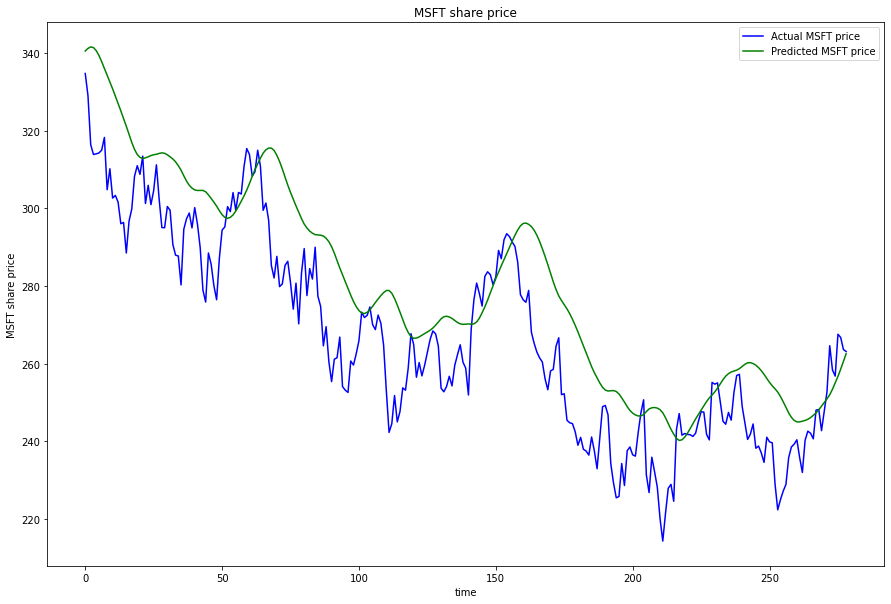

1/1 [==============================] - 2s 2s/step
prediction: [[264.40982]]


In [12]:
# We try with another model to see if we get better predictions

for tick in tickers:
  prediction_days = 60
  scaler = MinMaxScaler(feature_range=(0,1))
  START_DATE = dt.datetime(2015,1,1)
  END_DATE = dt.datetime(2023,1,1)
  df = get_data(tick, START_DATE, END_DATE)
  scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))
  x_train = []
  y_train = []

  for x in range(prediction_days, len(scaled_data)):
      x_train.append(scaled_data[x - prediction_days:x, 0])
      y_train.append(scaled_data[x, 0])
  print(f"Data Preprocessing for {tick} Stocks")
  x_train, y_train = np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
  lstm = LSTM_model(x_train)
  lstm.summary()
  lstm.compile(optimizer='adam', 
                loss='mean_squared_error')
  checkpointer = ModelCheckpoint(filepath = tick+'_weights_best.hdf5', 
                               verbose = 2, 
                               save_best_only = True)

  lstm.fit(x_train, 
            y_train, 
            epochs=25, 
            batch_size = 32,
            callbacks = [checkpointer])
  END_DATE = dt.datetime(2023,1,1)

  START_DATE_TEST = END_DATE
  test_data = get_data(tick, START_DATE_TEST,dt.datetime.now())
  actual_prices = test_data['Close'].values

  total_dataset = pd.concat((df['Close'], test_data['Close']), axis=0)

  lstm_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
  lstm_inputs = lstm_inputs.reshape(-1,1)
  lstm_inputs = scaler.transform(lstm_inputs)
  x_test = []
  for x in range(prediction_days, len(lstm_inputs)):
      x_test.append(lstm_inputs[x-prediction_days:x, 0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] ,1))

  predicted_prices = lstm.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)
    # save model 
  directory = "lstm_saved_model"
  parent_dir = "/content"
  path = os.path.join(parent_dir, directory)
  os.makedirs(path, exist_ok=True) 
  print("Directory '% s' created" % directory) 

  lstm.save('lstm_saved_model/'+tick+'_model')
  plt.figure(figsize=(15,10))
  plt.plot(actual_prices, color='blue', label=f"Actual {tick} price")
  plt.plot(predicted_prices, color= 'green', label=f"Predicted {tick} price")
  plt.title(f"{tick} share price")
  plt.xlabel("time")
  plt.ylabel(f"{tick} share price")
  plt.legend()
  plt.show()
  # predicting next day
  real_data = [lstm_inputs[len(lstm_inputs)+1 - prediction_days:len(lstm_inputs+1),0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))
  prediction = lstm.predict(real_data)
  prediction = scaler.inverse_transform(prediction)
  print(f"prediction: {prediction}")


In [13]:
!zip -r lstm_saved_model.zip lstm_saved_model/


  adding: lstm_saved_model/ (stored 0%)
  adding: lstm_saved_model/MSFT_model/ (stored 0%)
  adding: lstm_saved_model/MSFT_model/keras_metadata.pb (deflated 92%)
  adding: lstm_saved_model/MSFT_model/variables/ (stored 0%)
  adding: lstm_saved_model/MSFT_model/variables/variables.index (deflated 64%)
  adding: lstm_saved_model/MSFT_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: lstm_saved_model/MSFT_model/assets/ (stored 0%)
  adding: lstm_saved_model/MSFT_model/fingerprint.pb (stored 0%)
  adding: lstm_saved_model/MSFT_model/saved_model.pb (deflated 90%)
  adding: lstm_saved_model/TSLA_model/ (stored 0%)
  adding: lstm_saved_model/TSLA_model/keras_metadata.pb (deflated 92%)
  adding: lstm_saved_model/TSLA_model/variables/ (stored 0%)
  adding: lstm_saved_model/TSLA_model/variables/variables.index (deflated 64%)
  adding: lstm_saved_model/TSLA_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: lstm_saved_model/TSLA_model/assets/ (stored 0%)
  a

In [14]:
from google.colab import files
files.download("/content/lstm_saved_model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Second Method using LSTM
This method is less precise so we chose the previous method


[*********************100%***********************]  1 of 1 completed
Analysing Data for TSLA Stocks
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2015-01-02  14.858000  14.883333  14.217333  14.620667  14.620667  71466000
2015-01-05  14.303333  14.433333  13.810667  14.006000  14.006000  80527500
2015-01-06  14.004000  14.280000  13.614000  14.085333  14.085333  93928500
2015-01-07  14.223333  14.318667  13.985333  14.063333  14.063333  44526000
2015-01-08  14.187333  14.253333  14.000667  14.041333  14.041333  51637500
Plotting Data for TSLA Stocks


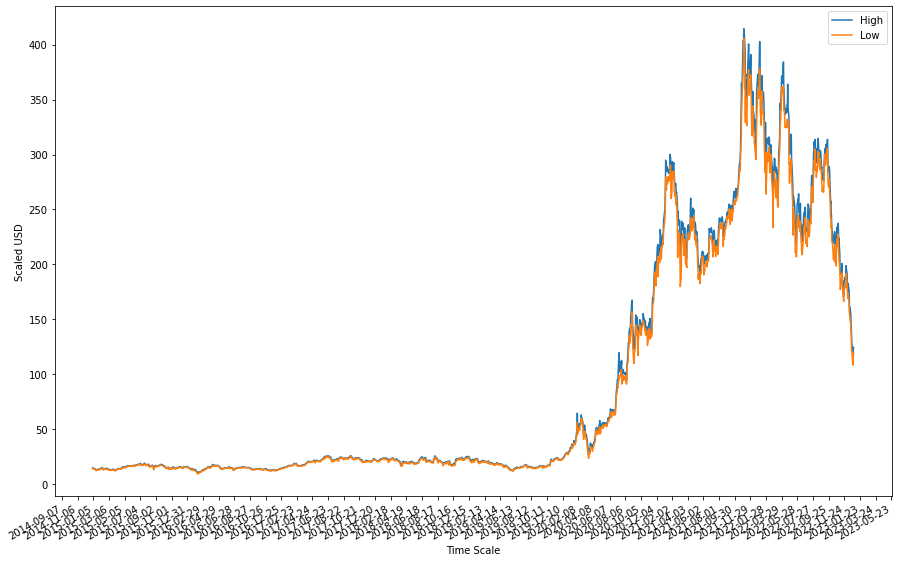

Data Preprocessing for TSLA Stocks
Feature Scaling for  TSLA
Train and Test Sets for Stock Price  TSLA
(2013, 2, 5) (1611, 2, 5) (402, 2, 5) (402,)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 2, 50)             11200     
                                                                 
 lstm_20 (LSTM)              (None, 50)                20200     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 31,451
Trainable params: 31,451
Non-trainable params: 0
_________________________________________________________________
Reshape training array to 2d
Epoch 1/100
403/403 - 5s - loss: 20943637072314368.0000 - 5s/epoch - 13ms/step
Epoch 2/100
403/403 - 2s - loss: 18671129073811456.0000 - 

Y_pred.shape (402, 1)
Y_test.shape (402,)
RSME:  183036205.5851171
MAPE:  2.5552610966916975
Plot Prediction for %s Stock TSLA


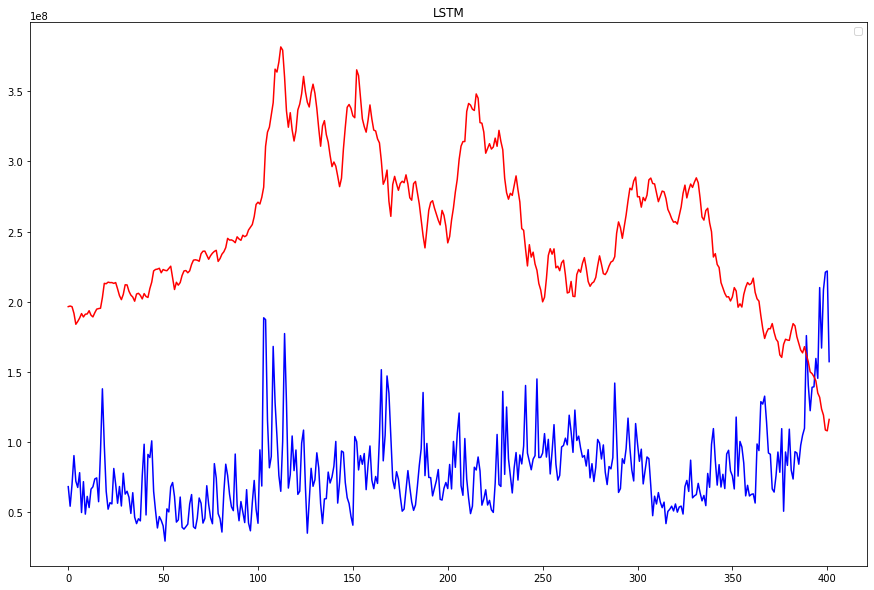

[*********************100%***********************]  1 of 1 completed
Analysing Data for AAPL Stocks
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2015-01-02  27.847500  27.860001  26.837500  27.332500  24.565697  212818400
2015-01-05  27.072500  27.162500  26.352501  26.562500  23.873644  257142000
2015-01-06  26.635000  26.857500  26.157499  26.565001  23.875889  263188400
2015-01-07  26.799999  27.049999  26.674999  26.937500  24.210684  160423600
2015-01-08  27.307501  28.037500  27.174999  27.972500  25.140915  237458000
Plotting Data for AAPL Stocks


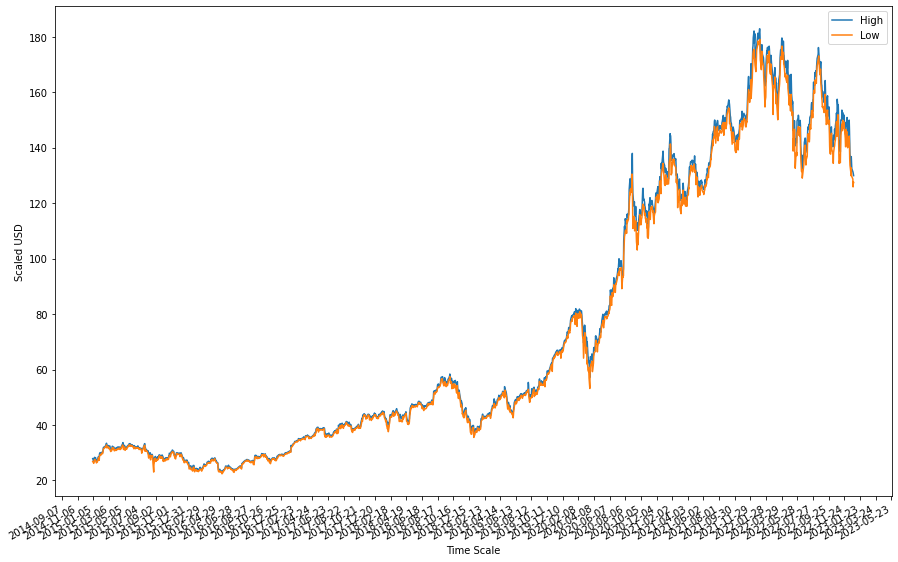

Data Preprocessing for AAPL Stocks
Feature Scaling for  AAPL
Train and Test Sets for Stock Price  AAPL
(2013, 2, 5) (1611, 2, 5) (402, 2, 5) (402,)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 2, 50)             11200     
                                                                 
 lstm_22 (LSTM)              (None, 50)                20200     
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 31,451
Trainable params: 31,451
Non-trainable params: 0
_________________________________________________________________
Reshape training array to 2d
Epoch 1/100
403/403 - 6s - loss: 24943456363216896.0000 - 6s/epoch - 14ms/step
Epoch 2/100
403/403 - 2s - loss: 19733729752645632.0000 - 

Y_pred.shape (402, 1)
Y_test.shape (402,)
RSME:  161553244.62802887
MAPE:  2.05523335691054
Plot Prediction for %s Stock AAPL


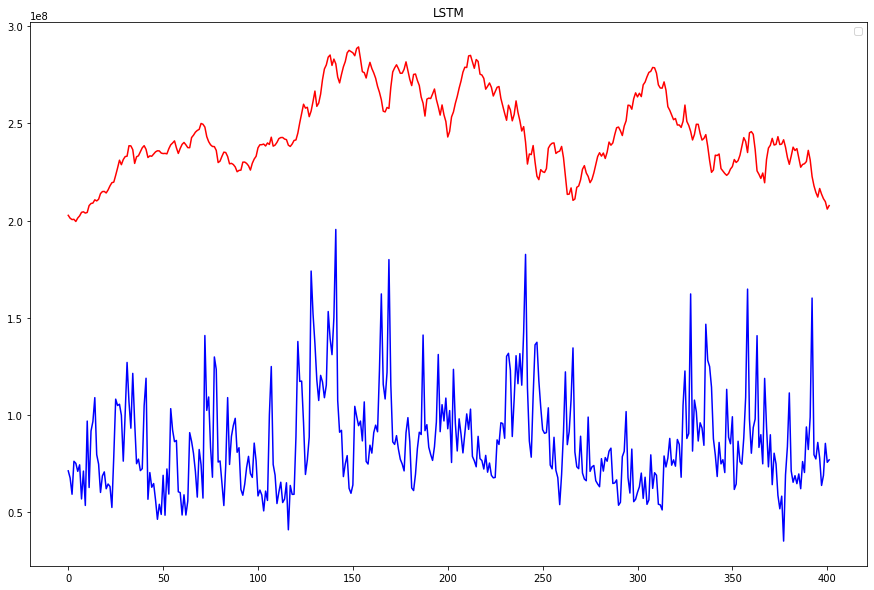

[*********************100%***********************]  1 of 1 completed
Analysing Data for AMZN Stocks
               Open     High      Low    Close  Adj Close    Volume
Date                                                               
2015-01-02  15.6290  15.7375  15.3480  15.4260    15.4260  55664000
2015-01-05  15.3505  15.4190  15.0425  15.1095    15.1095  55484000
2015-01-06  15.1120  15.1500  14.6190  14.7645    14.7645  70380000
2015-01-07  14.8750  15.0640  14.7665  14.9210    14.9210  52806000
2015-01-08  15.0160  15.1570  14.8055  15.0230    15.0230  61768000
Plotting Data for AMZN Stocks


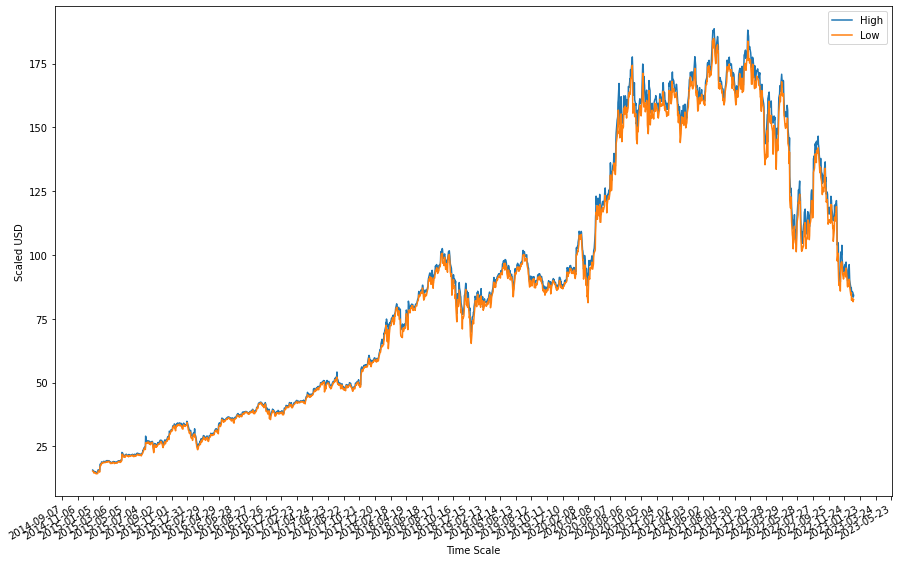

Data Preprocessing for AMZN Stocks
Feature Scaling for  AMZN
Train and Test Sets for Stock Price  AMZN
(2013, 2, 5) (1611, 2, 5) (402, 2, 5) (402,)
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 2, 50)             11200     
                                                                 
 lstm_24 (LSTM)              (None, 50)                20200     
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 31,451
Trainable params: 31,451
Non-trainable params: 0
_________________________________________________________________
Reshape training array to 2d
Epoch 1/100
403/403 - 6s - loss: 8692068914298880.0000 - 6s/epoch - 15ms/step
Epoch 2/100
403/403 - 2s - loss: 5264391343702016.0000 - 2s

Y_pred.shape (402, 1)
Y_test.shape (402,)
RSME:  50237339.21627417
MAPE:  0.7309412695697268
Plot Prediction for %s Stock AMZN


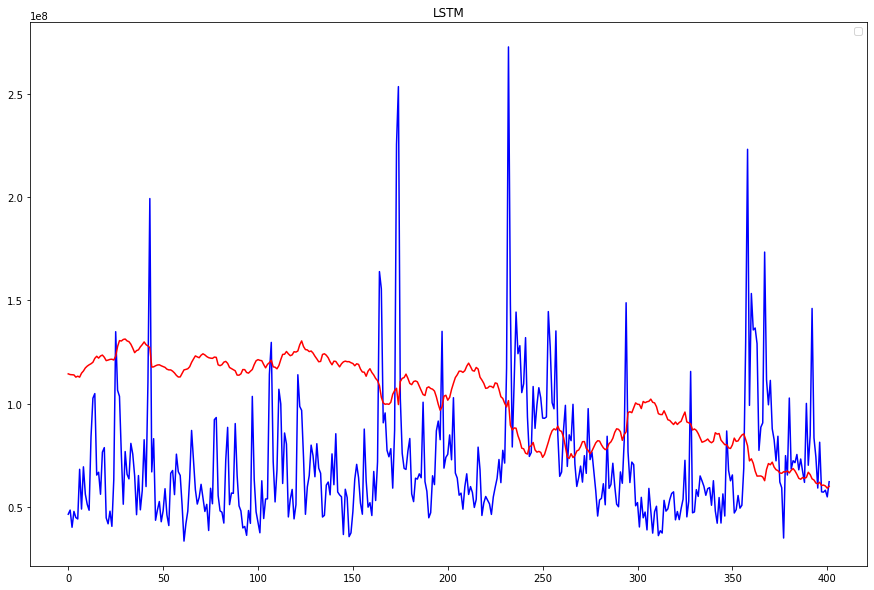

[*********************100%***********************]  1 of 1 completed
Analysing Data for GOOG Stocks
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2015-01-02  26.378078  26.490770  26.133251  26.168653  26.168653  28951268
2015-01-05  26.091366  26.144720  25.582764  25.623152  25.623152  41196796
2015-01-06  25.679497  25.738087  24.983908  25.029282  25.029282  57998800
2015-01-07  25.280592  25.292759  24.914099  24.986401  24.986401  41301082
2015-01-08  24.831326  25.105074  24.482782  25.065184  25.065184  67071641
Plotting Data for GOOG Stocks


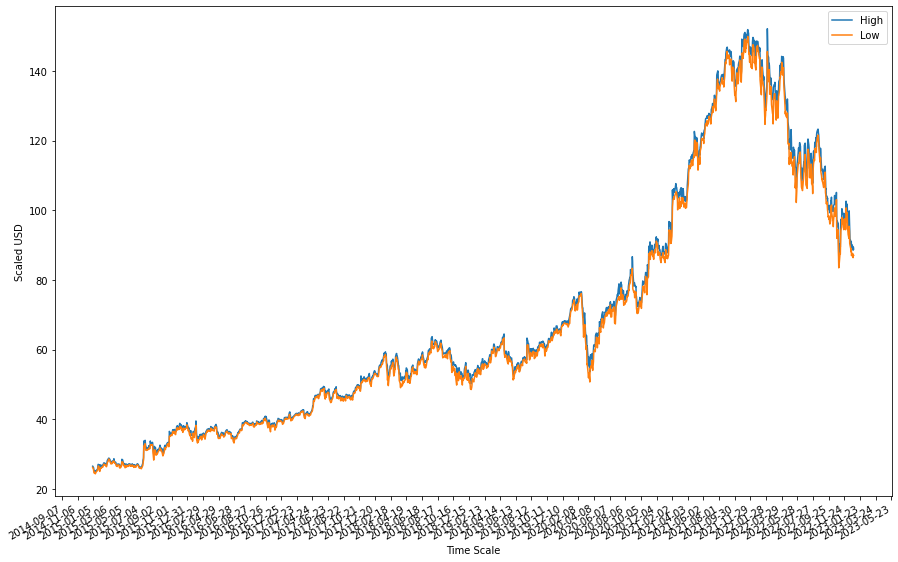

Data Preprocessing for GOOG Stocks
Feature Scaling for  GOOG
Train and Test Sets for Stock Price  GOOG
(2013, 2, 5) (1611, 2, 5) (402, 2, 5) (402,)
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 2, 50)             11200     
                                                                 
 lstm_26 (LSTM)              (None, 50)                20200     
                                                                 
 dense_10 (Dense)            (None, 1)                 51        
                                                                 
Total params: 31,451
Trainable params: 31,451
Non-trainable params: 0
_________________________________________________________________
Reshape training array to 2d
Epoch 1/100
403/403 - 6s - loss: 1364478226595840.0000 - 6s/epoch - 15ms/step
Epoch 2/100
403/403 - 2s - loss: 686006269378560.0000 - 2s

Y_pred.shape (402, 1)
Y_test.shape (402,)
RSME:  32552347.951705847
MAPE:  1.4332054765007796
Plot Prediction for %s Stock GOOG


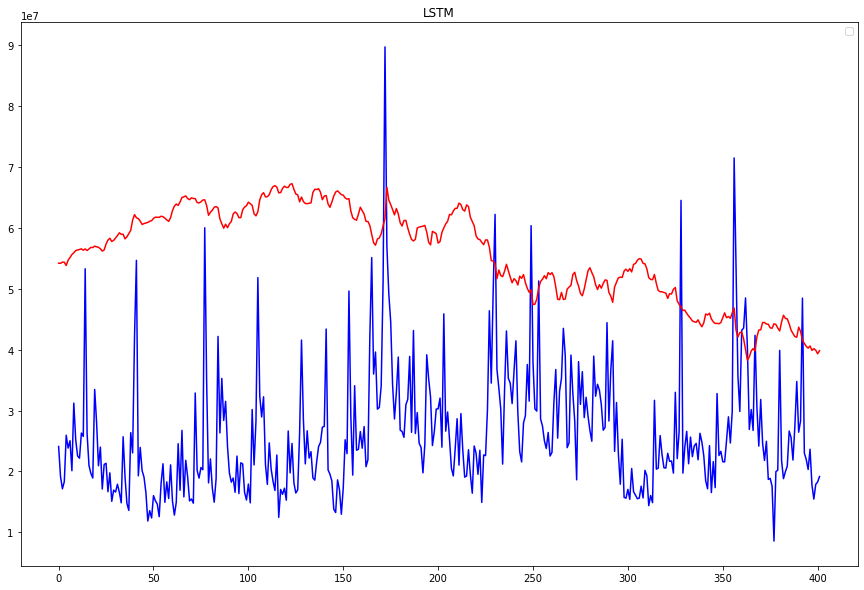

[*********************100%***********************]  1 of 1 completed
Analysing Data for MSFT Stocks
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2015-01-02  46.660000  47.419998  46.540001  46.759998  40.811424  27913900
2015-01-05  46.369999  46.730000  46.250000  46.330002  40.436131  39673900
2015-01-06  46.380001  46.750000  45.540001  45.650002  39.842632  36447900
2015-01-07  45.980000  46.459999  45.490002  46.230000  40.348862  29114100
2015-01-08  46.750000  47.750000  46.720001  47.590000  41.535843  29645200
Plotting Data for MSFT Stocks


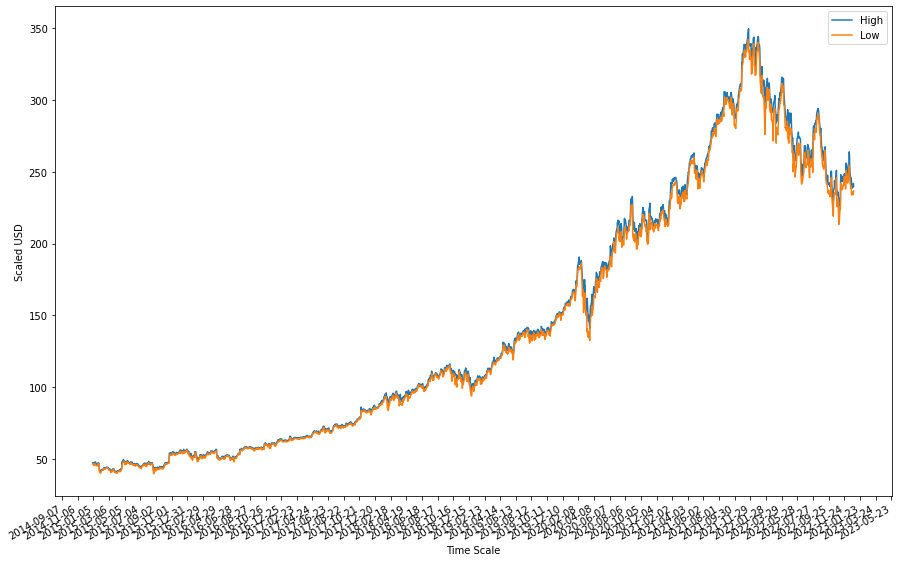

Data Preprocessing for MSFT Stocks
Feature Scaling for  MSFT
Train and Test Sets for Stock Price  MSFT
(2013, 2, 5) (1611, 2, 5) (402, 2, 5) (402,)
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 2, 50)             11200     
                                                                 
 lstm_28 (LSTM)              (None, 50)                20200     
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 31,451
Trainable params: 31,451
Non-trainable params: 0
_________________________________________________________________
Reshape training array to 2d
Epoch 1/100
403/403 - 6s - loss: 962022678200320.0000 - 6s/epoch - 15ms/step
Epoch 2/100
403/403 - 2s - loss: 491015660109824.0000 - 2s/

Y_pred.shape (402, 1)
Y_test.shape (402,)
RSME:  21732605.224303
MAPE:  0.8463402448467734
Plot Prediction for %s Stock MSFT


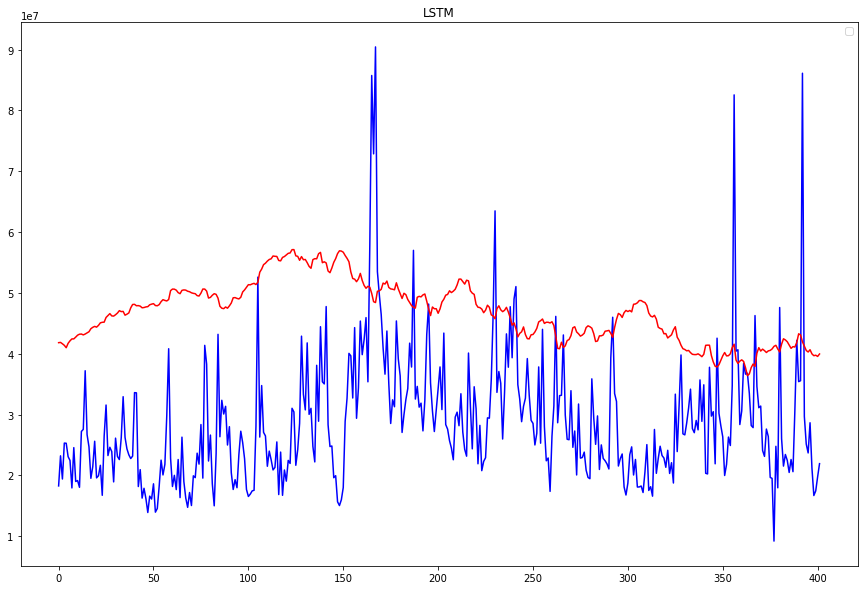

In [19]:
from numpy.core.fromnumeric import mean
for tick in tickers: 
  startDate = dt.datetime(2015,1,1)
  endDate = dt.datetime(2023,1,1)
  df = get_data(tick, startDate, endDate)
  print(f"Analysing Data for {tick} Stocks")
  print(df.head())
  print(f"Plotting Data for {tick} Stocks")
  plt.figure(figsize=(15,10))
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
  plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
  x_dates = [d for d in df.index.values]

  plt.plot(x_dates, df['High'], label='High')
  plt.plot(x_dates, df['Low'], label='Low')
  plt.xlabel('Time Scale')
  plt.ylabel('Scaled USD')
  plt.legend()
  plt.gcf().autofmt_xdate()
  plt.show()
  print(f"Data Preprocessing for {tick} Stocks")
  target_y = df['Close']
  X_feat = df.iloc[:,0:3]
  print("Feature Scaling for ", tick)
  sc = StandardScaler()
  X_ft = sc.fit_transform(X_feat.values)
  X_ft = pd.DataFrame(columns = X_feat.columns, data=X_ft, index=X_feat.index)
  print("Train and Test Sets for Stock Price ", tick)
  X1, y1 = lstm_split(df.values, n_steps=2)
  train_split = 0.8
  split_idx = int(np.ceil(len(X1)*train_split))
  date_index = df.index

  X_train, X_test = X1[:split_idx], X1[split_idx:]
  y_train, y_test = y1[:split_idx], y1[split_idx:]
  X_train_date, X_test_date = date_index[:split_idx], date_index[split_idx:]

  print(X1.shape, X_train.shape, X_test.shape, y_test.shape)
  lstm = Sequential()
  lstm.add(LSTM(50, input_shape =(X_train.shape[1], X_train.shape[2]),
                activation='relu', return_sequences=True))
  lstm.add(LSTM(50, activation='relu'))
  lstm.add(Dense(1))
  lstm.compile(loss='mean_squared_error', optimizer='adam')
  lstm.summary()
  print("Reshape training array to 2d")

  history=lstm.fit(X_train, y_train, epochs=100, batch_size=4, verbose=2, shuffle=False)
  y_pred = lstm.predict(X_test)
  # save model 
  directory = "saved_model"
  parent_dir = "/content"
  path = os.path.join(parent_dir, directory)
  os.makedirs(path, exist_ok=True) 
  print("Directory '% s' created" % directory) 

  lstm.save('saved_model/'+tick+'_model')
  print("Y_pred.shape",y_pred.shape)
  print("Y_test.shape", y_test.shape)
  y_pred_1 = y_pred.reshape(-1)

  # print("Reshaped y_pred is", y_pred_1.shape)
  # y_pred_1d = y_pred_1[:4]
  # print("Reshaped y_pred is",y_pred_1d.shape)
  rmse = mean_squared_error(y_test, y_pred_1, squared=False)
  mape = mean_absolute_percentage_error(y_test, y_pred_1)
  print("RSME: ", rmse)
  print("MAPE: ", mape)

  print("Plot Prediction for %s Stock", tick)
  # plot y_test with y_pred
  plotGraph(y_test, y_pred, "LSTM")